<a href="https://colab.research.google.com/github/anavlajovic/domaci/blob/main/domaci-nacasu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:

import pandas as pd

df = pd.read_csv("Real estate.csv")
df.head

<bound method NDFrame.head of       No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4    

In [8]:
df.describe

<bound method NDFrame.describe of       No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4

<Axes: >

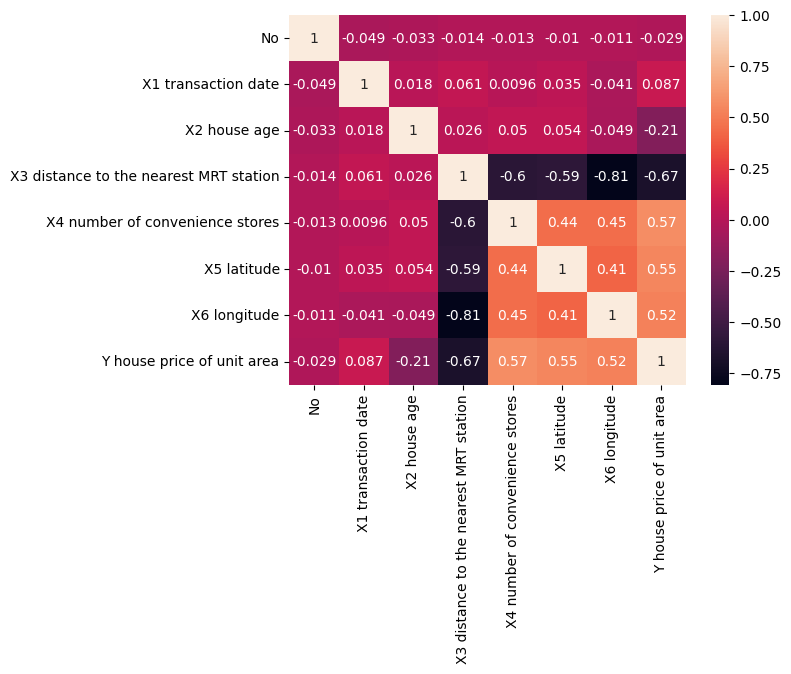

In [12]:
import seaborn as sns
cor = df.corr()
sns.heatmap(cor,annot= True)

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np
data = df[['X3 distance to the nearest MRT station', 'Y house price of unit area']]
data= data.rename(columns={"X3 distance to the nearest MRT station": "X", 'Y house price of unit area' : 'Y' })
print(data.columns)
train,test = train_test_split(data, test_size=0.2, random_state=42)

x_mean= np.mean(train["X"])
y_mean= np.mean(train["Y"])
brojilac=0
imenilac=0

for index, row in train.iterrows():
  x=row[0]
  y=row[1]
brojilac += (x -x_mean)*(y-y_mean)
imenilac += (x -x_mean)**2

beta=brojilac/imenilac

alpha=y_mean - beta* x_mean



Index(['X', 'Y'], dtype='object')


In [14]:
import math
def rmse(y_true, y_pred):
  sum=0
  for yt, yp in zip(y_true, y_pred):
    sum += (yt- yp)**2
    return math.sqrt(sum/ len(y_true))

def mae(y_true, y_pred):
  sum=0
  for yt, yp in zip(y_true, y_pred):
    sum+= abs(yt - yp)
    return sum/ len(y_true)

In [17]:
model = lambda x, alpha, beta: alpha + beta * x
y_pred= model(test['X'], alpha, beta)
y_true= test['Y']

print(rmse(y_true, y_pred))
print(mae(y_true, y_pred))

1.02080761790412
0.1120481927710843


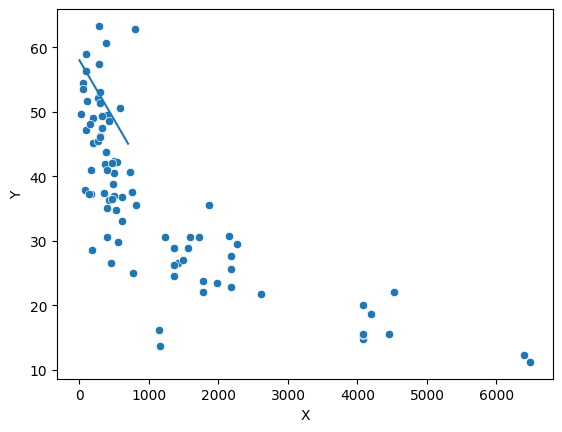

In [18]:
import matplotlib.pyplot as plt
sns.scatterplot(test, x='X', y='Y')
x = np.linspace(0,700)
y = model(x, alpha, beta)

sns.lineplot(x= x, y=y)
plt.show()